**Importing the dataset**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'12J0GGTr_jnvYsnGisNwoNAaG2QFGXyhn'}) 
downloaded.GetContentFile('Dataset for FODS Assignment.csv')

**Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

**Reading the dataset**

In [ ]:
data = pd.read_csv('Dataset for FODS Assignment.csv')

**Use of Co-relation Matrix**

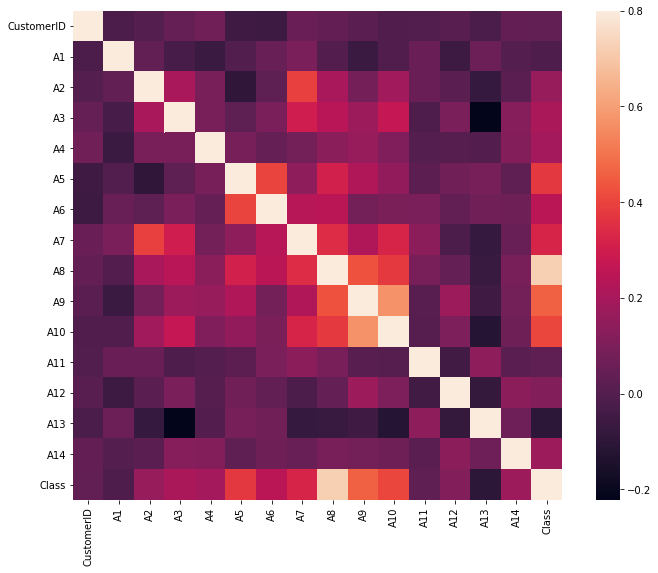

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

**Divide data values into Target and Feature**

In [ ]:
#dividing the X and the Y from the dataset
X=data.drop(['Class'], axis =1)
Y=data['Class']

X_data=X.values
Y_data=Y.values

**Split dataset into 80% training and 20% testing**

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

 *Creating and training the model**

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

**Printing the results of fraud detection**

In [ ]:
print(y_pred)

[1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1]


**Values of evaluation metrics**

In [ ]:

from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_errors = (y_pred != Y_test).sum()
print('The model used is Random Forest classifier')
acc= accuracy_score(Y_test, y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(Y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(Y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(Y_test,y_pred)
print('The F1-Score is {}'.format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print('The Matthews correlation coefficient is{}'.format(MCC))

The model used is Random Forest classifier
The accuracy is 0.8913043478260869
The precision is 0.86
The recall is 0.8431372549019608
The F1-Score is 0.8514851485148515
The Matthews correlation coefficient is0.7658774837518179


**Visualize confusion matrix**

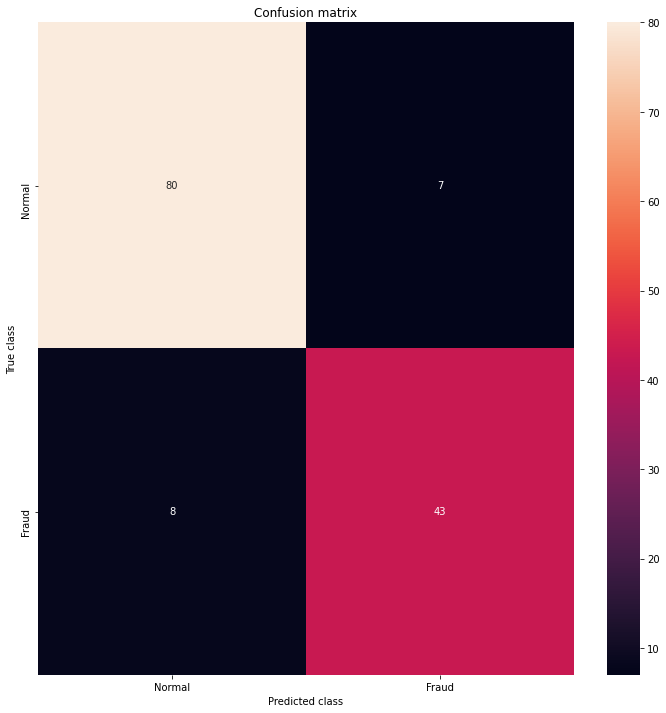

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

**Visualize a random single tree**

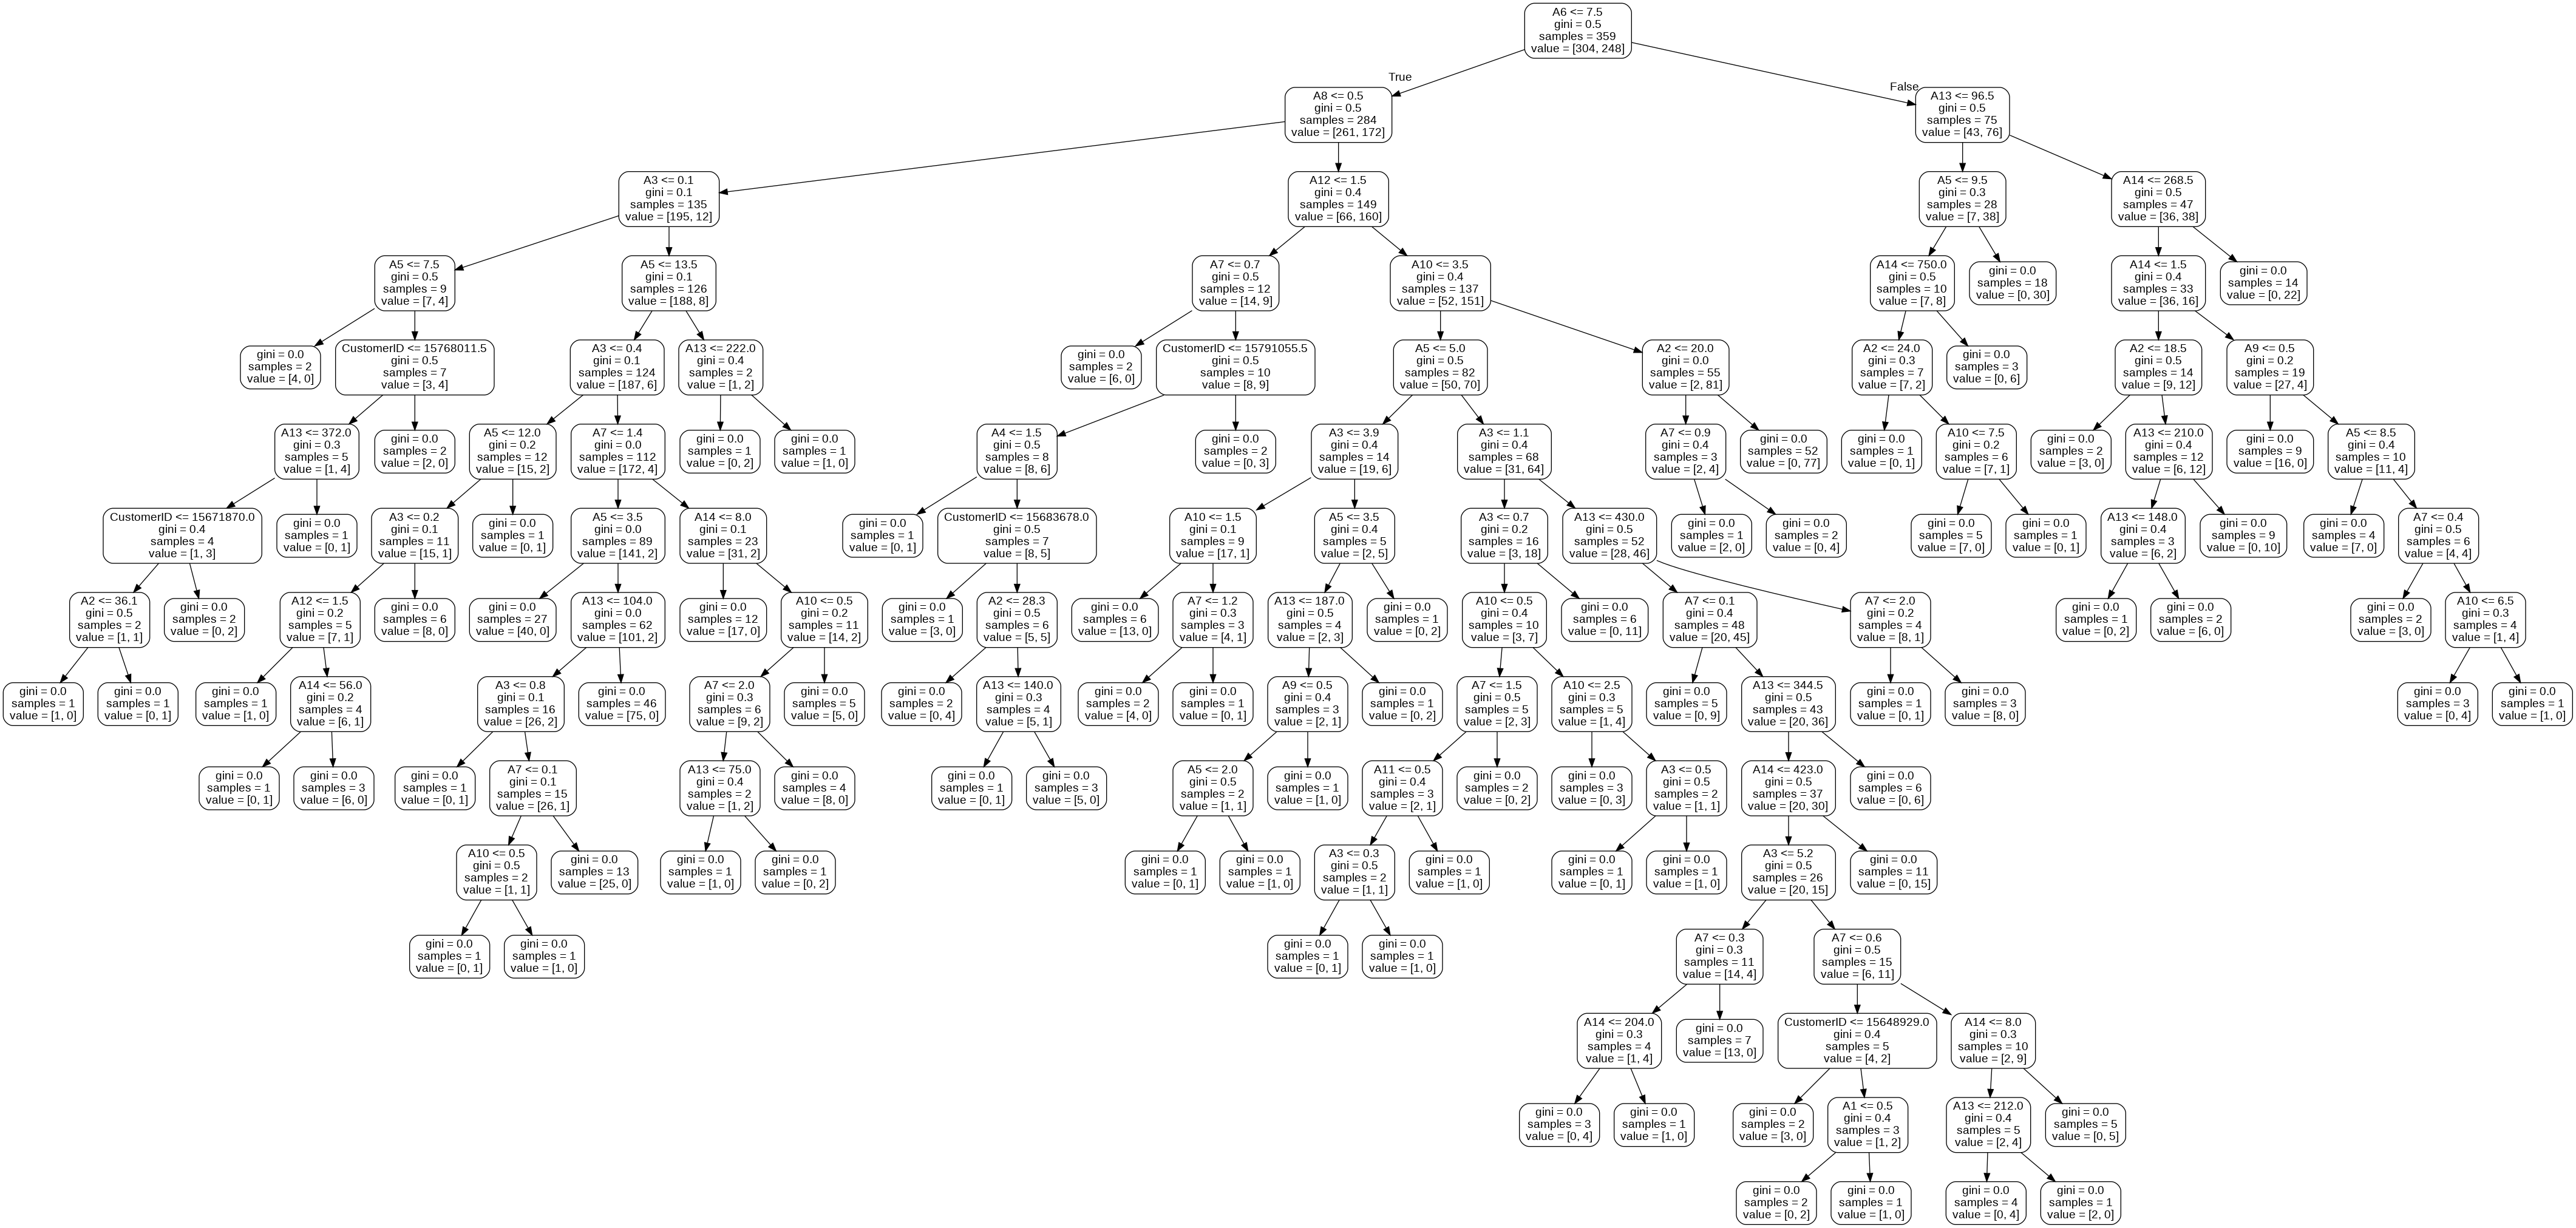

In [ ]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))